### Using the data from Question 3, write code to analyze the data and answer the following questions Note 1. Draw plots to demonstrate the analysis for the following questions for better visualizations.
2.	Write code comments wherever required for code understanding



Insights to be drawn -
●	Get all Pokemons whose spawn rate is less than 5%
●	Get all Pokemons that have less than 4 weaknesses
●	Get all Pokemons that have no multipliers at all
●	Get all Pokemons that do not have more than 2 evolutions
●	Get all Pokemons whose spawn time is less than 300 seconds.
Note - spawn time format is "05:32”, so assume “minute: second” format and perform the analysis.

●	Get all Pokemon who have more than two types of capabilities


Pokemons with spawn time less than 300 seconds:
['Squirtle', 'Metapod', 'Weedle', 'Kakuna', 'Pidgey', 'Pidgeotto', 'Rattata', 'Pikachu', 'Sandshrew', 'Nidoran ♀ (Female)', 'Nidoran ♂ (Male)', 'Clefairy', 'Oddish', 'Paras', 'Venonat', 'Diglett', 'Meowth', 'Psyduck', 'Growlithe', 'Poliwag', 'Abra', 'Machop', 'Bellsprout', 'Tentacool', 'Graveler', 'Ponyta', 'Magnemite', 'Gastly', 'Haunter', 'Drowzee', 'Krabby', 'Voltorb', 'Cubone', 'Rhyhorn', 'Horsea', 'Goldeen', 'Kabuto']
Pokemons with spawn rate less than 5%:
['Ivysaur', 'Charmeleon', 'Wartortle', 'Kadabra', 'Machoke', 'Dragonair']

Pokemons with less than 4 weaknesses:
['Charmander', 'Charmeleon', 'Squirtle', 'Wartortle', 'Caterpie', 'Metapod', 'Pidgey', 'Pidgeotto', 'Rattata', 'Spearow', 'Ekans', 'Pikachu', 'Sandshrew', 'Nidoran ♀ (Female)', 'Nidorina', 'Nidoran ♂ (Male)', 'Nidorino', 'Clefairy', 'Vulpix', 'Jigglypuff', 'Diglett', 'Meowth', 'Psyduck', 'Mankey', 'Growlithe', 'Poliwag', 'Poliwhirl', 'Abra', 'Kadabra', 'Machop', 'Machoke

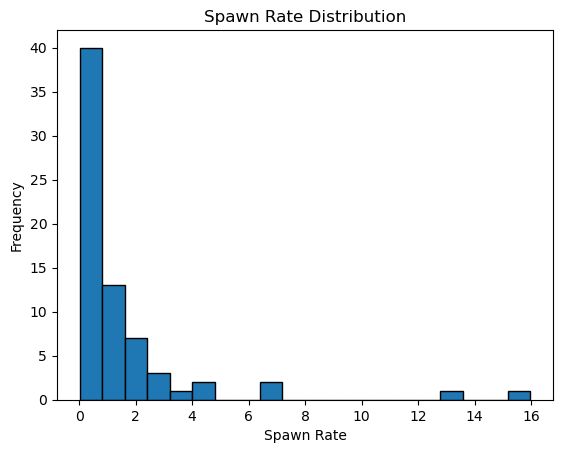

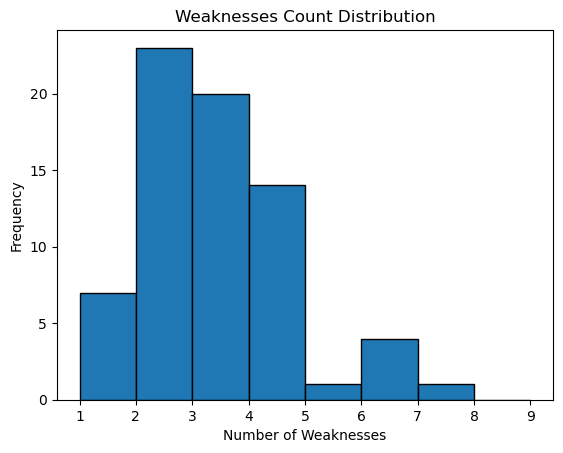

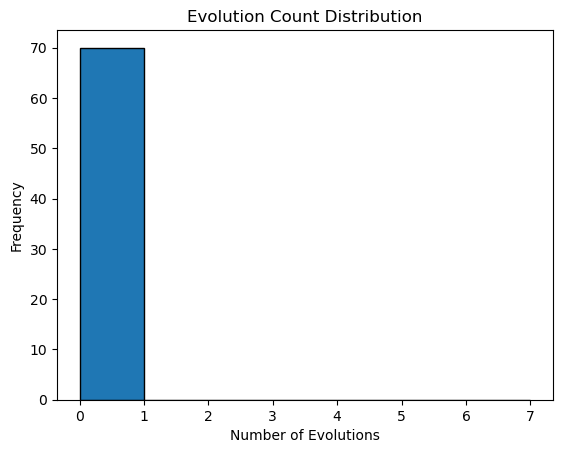

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Function to download the data from the provided link
def download_data(url):
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        return data
    else:
        raise Exception(f"Error downloading data from {url}: {response.status_code}")

# Function to process the data and convert it into a structured format
def process_data(data):
    structured_data = []
    for pokemon in data:
        spawn_time = pokemon.get('spawn_time', 'N/A')
        if spawn_time == 'N/A':
            continue  # Skip Pokemon with "N/A" spawn time
        
        multipliers = pokemon.get('multipliers')
        if multipliers is None:
            continue  # Skip Pokemon with None multipliers
        
        attributes = {
            'id': pokemon['id'],
            'num': pokemon['num'],
            'name': pokemon['name'],
            'img': pokemon['img'],
            'type': ', '.join(pokemon['type']),
            'height': pokemon['height'],
            'weight': pokemon['weight'],
            'candy': pokemon.get('candy', ''),
            'candy_count': pokemon.get('candy_count', 0),
            'egg': pokemon.get('egg', ''),
            'spawn_chance': pokemon.get('spawn_chance', 0),
            'avg_spawns': pokemon.get('avg_spawns', 0),
            'spawn_time': spawn_time,
            'multipliers': ', '.join(map(str, multipliers)),
            'weakness': ', '.join(pokemon.get('weaknesses', [])),
            'evolutions': len(pokemon.get('evolutions', []))
        }
        structured_data.append(attributes)
    
    # Get all Pokemons whose spawn time is less than 300 seconds
    spawn_time_less_than_300 = [pokemon['name'] for pokemon in structured_data if pokemon['spawn_time'] != 'N/A' and int(pokemon['spawn_time'].split(':')[0]) < 5]
    print("Pokemons with spawn time less than 300 seconds:")
    print(spawn_time_less_than_300)
    
    return structured_data




# Function to save the data in Excel format
def save_to_excel(data, filename):
    df = pd.DataFrame(data)
    writer = pd.ExcelWriter(filename, engine='openpyxl')
    df.to_excel(writer, index=False)
    writer.save()

# Function to analyze the data and answer the questions
def analyze_data(data):
    # Get all Pokemons whose spawn rate is less than 5%
    spawn_rate_less_than_5 = [pokemon['name'] for pokemon in data if pokemon['spawn_chance'] < 0.05]
    print("Pokemons with spawn rate less than 5%:")
    print(spawn_rate_less_than_5)
    print()

    # Get all Pokemons that have less than 4 weaknesses
    less_than_4_weaknesses = [pokemon['name'] for pokemon in data if len(pokemon['weakness'].split(', ')) < 4]
    print("Pokemons with less than 4 weaknesses:")
    print(less_than_4_weaknesses)
    print()

    # Get all Pokemons that have no multipliers at all
    no_multipliers = [pokemon['name'] for pokemon in data if pokemon['multipliers'] == '']
    print("Pokemons with no multipliers:")
    print(no_multipliers)
    print()
    
    # Get all Pokemons that do not have more than 2 evolutions
    less_than_2_evolutions = [pokemon['name'] for pokemon in data if pokemon['evolutions'] < 2]
    print("Pokemons with less than 2 evolutions:")
    print(less_than_2_evolutions)
    print()

    # Get all Pokemons whose spawn time is less than 300 seconds
    spawn_time_less_than_300 = [pokemon['name'] for pokemon in data if int(pokemon['spawn_time'].split(':')[0]) < 5]
    print("Pokemons with spawn time less than 300 seconds:")
    print(spawn_time_less_than_300)
    print()

    # Get all Pokemon who have more than two types of capabilities
    more_than_2_types = [pokemon['name'] for pokemon in data if len(pokemon['type'].split(', ')) > 2]
    print("Pokemons with more than two types of capabilities:")
    print(more_than_2_types)
    print()

    # Plotting

    # Spawn Rate Distribution
    spawn_rates = [pokemon['spawn_chance'] for pokemon in data]
    plt.hist(spawn_rates, bins=20, edgecolor='black')
    plt.xlabel('Spawn Rate')
    plt.ylabel('Frequency')
    plt.title('Spawn Rate Distribution')
    plt.show()

    # Weaknesses Count Distribution
    weaknesses_count = [len(pokemon['weakness'].split(', ')) for pokemon in data]
    plt.hist(weaknesses_count, bins=range(1, 10), edgecolor='black')
    plt.xlabel('Number of Weaknesses')
    plt.ylabel('Frequency')
    plt.title('Weaknesses Count Distribution')
    plt.show()

    # Evolution Count Distribution
    evolution_count = [pokemon['evolutions'] for pokemon in data]
    plt.hist(evolution_count, bins=range(0, 8), edgecolor='black')
    plt.xlabel('Number of Evolutions')
    plt.ylabel('Frequency')
    plt.title('Evolution Count Distribution')
    plt.show()

# Main function to download, process, and analyze the data
def main():
    url = 'https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json'
    filename = 'pokemon_data.xlsx'

    # Download the data
    data = download_data(url)

    # Process the data and convert it into a structured format
    structured_data = process_data(data['pokemon'])

    # Save the structured data to Excel format
    save_to_excel(structured_data, filename)

    # Analyze the data and answer the questions
    analyze_data(structured_data)

# Run the main function
if __name__ == '__main__':
    main()